## CONVERTING LOG FILE TO DATAFRAME


In [2]:
import pandas as pd

f = open("sysmexdata24.log", "r")
Lines = f.readlines()

STUDY_ID_IDENTIFIER = '4O'
COLUMNS_IDENTIFIER = 'A2'
ROW_BREAK_IDENTIFIER = '2B'

data_list = []
count = 1
current_study_id = None
current_columns_names = []
current_columns_values = []
current_columns_units = []
current_column_datetime = None

# Strips the newline character
for line in Lines:

    if line.strip() == ROW_BREAK_IDENTIFIER and current_study_id is not None: 
        df_row = [current_study_id, current_column_datetime]
        df_row.extend(current_columns_values[:len(current_columns_names)])
        data_list.append(df_row)

        current_study_id = None
        current_columns_names = []
        current_columns_values = []
        current_columns_units = []
        current_column_datetime = None
        continue

    current_line = line.strip()
    
    if STUDY_ID_IDENTIFIER in current_line:
        current_line_split = current_line.split('|')
        # Searching for study id
        current_study_id = current_line_split[3].replace(' ','').replace('^M','').replace('^','')
        
        columns_line_split = current_line_split[4].split(COLUMNS_IDENTIFIER)
        columns_split = columns_line_split[0].split('\\')

        # Searching for column names
        for column in columns_split:
            current_columns_names.append(column.split('%')[0].replace('^^^^', '').replace('#', ''))

        # print(current_study_id, current_columns_names)
           

    if current_study_id is not None and len(current_columns_names) != 0 and len(current_columns_names) >= (len(current_columns_values)): 
        for column_name in current_columns_names:
            if column_name in current_line:
                column_data_split = current_line.split('|')
                if len(column_data_split) == 13:
                    current_columns_values.append(float(column_data_split[3]))
                    current_columns_units.append(column_data_split[4])
                    current_column_datetime = column_data_split[-1]

df_columns = ['study_id', 'Date']
df_columns.extend(current_columns_names)

df = pd.DataFrame(data_list, columns=df_columns)

print(df.head)

<bound method NDFrame.head of   study_id            Date   WBC   RBC   HGB   HCT   MCV   MCH  MCHC   PLT  \
0  31DTS02  20220923162802  1.69  5.52  15.6  48.8  88.4  28.3  32.0  32.0   
1  30DTS02  20220923162700  2.85  5.95  14.2  44.5  74.8  23.9  31.9  31.9   
2  29DTS02  20220923162545  1.96  5.81  15.9  48.7  83.8  27.4  32.6  32.6   
3  28DTS02  20220923162435  1.95  3.64   5.6  20.5  56.3  15.4  27.3  27.3   
4  27DTS02  20220923162326  3.38  5.39  12.8  40.2  74.6  23.7  31.8  31.8   
5  24DTS02  20220923162057  5.69  6.38  17.0  51.0  79.9  26.6  33.3  33.3   
6  20DTS02  20220923161758  1.76  5.19  16.0  48.2  92.9  30.8  33.2  33.2   
7  18DTS02  20220923161652  1.84  4.74  13.0  39.3  82.9  27.4  33.1  33.1   

   ...   PCT  NEUT  LYMPH  MONO   EO  BASO  NEUT  LYMPH  MONO    EO  
0  ...  14.8  14.8    5.9   5.9  2.4  0.12  0.12   1.18  1.18  0.25  
1  ...   NaN   NaN    NaN   NaN  NaN   NaN   NaN    NaN   NaN   NaN  
2  ...  15.3  15.3    6.6   6.6  2.6  0.13  0.13   1.35  

## SAVING INTO CSV


In [27]:
df.to_csv('sysmexdata24.csv')

## BASIC STATS IN DATAFRAME

In [3]:

# Fill missing values with the mean of each column
df_filled = df.fillna(df.mean())

# Display the DataFrame with filled missing values
print(df_filled)


  study_id            Date   WBC   RBC   HGB   HCT   MCV   MCH  MCHC   PLT  \
0  31DTS02  20220923162802  1.69  5.52  15.6  48.8  88.4  28.3  32.0  32.0   
1  30DTS02  20220923162700  2.85  5.95  14.2  44.5  74.8  23.9  31.9  31.9   
2  29DTS02  20220923162545  1.96  5.81  15.9  48.7  83.8  27.4  32.6  32.6   
3  28DTS02  20220923162435  1.95  3.64   5.6  20.5  56.3  15.4  27.3  27.3   
4  27DTS02  20220923162326  3.38  5.39  12.8  40.2  74.6  23.7  31.8  31.8   
5  24DTS02  20220923162057  5.69  6.38  17.0  51.0  79.9  26.6  33.3  33.3   
6  20DTS02  20220923161758  1.76  5.19  16.0  48.2  92.9  30.8  33.2  33.2   
7  18DTS02  20220923161652  1.84  4.74  13.0  39.3  82.9  27.4  33.1  33.1   

   ...   PCT  NEUT      LYMPH       MONO        EO      BASO   NEUT     LYMPH  \
0  ...  14.8  14.8   5.900000   5.900000  2.400000  0.120000   0.12  1.180000   
1  ...  14.1  14.1   6.928571   6.928571  2.757143  0.538571  14.10  6.928571   
2  ...  15.3  15.3   6.600000   6.600000  2.600000  0.

<ipython-input-3-fa3337ecab9d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


In [4]:
# Drop missing values in all columns
df.dropna(inplace=True)

# Display the modified DataFrame
print(df)

  study_id            Date   WBC   RBC   HGB   HCT   MCV   MCH  MCHC   PLT  \
0  31DTS02  20220923162802  1.69  5.52  15.6  48.8  88.4  28.3  32.0  32.0   
2  29DTS02  20220923162545  1.96  5.81  15.9  48.7  83.8  27.4  32.6  32.6   
3  28DTS02  20220923162435  1.95  3.64   5.6  20.5  56.3  15.4  27.3  27.3   
4  27DTS02  20220923162326  3.38  5.39  12.8  40.2  74.6  23.7  31.8  31.8   
5  24DTS02  20220923162057  5.69  6.38  17.0  51.0  79.9  26.6  33.3  33.3   
6  20DTS02  20220923161758  1.76  5.19  16.0  48.2  92.9  30.8  33.2  33.2   
7  18DTS02  20220923161652  1.84  4.74  13.0  39.3  82.9  27.4  33.1  33.1   

   ...   PCT  NEUT  LYMPH  MONO   EO  BASO  NEUT  LYMPH  MONO    EO  
0  ...  14.8  14.8    5.9   5.9  2.4  0.12  0.12   1.18  1.18  0.25  
2  ...  15.3  15.3    6.6   6.6  2.6  0.13  0.13   1.35  1.35  0.30  
3  ...  15.4  15.4   15.9  15.9  3.1  0.27  0.27   1.01  1.01  0.30  
4  ...  12.4  12.4    9.8   9.8  2.1  0.37  0.37   2.19  2.19  0.42  
5  ...  12.3  12.3    4.2

In [5]:
df.describe()
#basic stats

,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,RDW-SD,RDW-CV,...,PCT,NEUT,LYMPH,MONO,EO,BASO,NEUT,LYMPH,MONO,EO
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.00000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.610000,5.238571,13.700000,42.385714,79.828571,25.657143,31.900000,31.900000,188.714286,17.900000,...,14.10000,14.10000,6.928571,6.928571,2.757143,0.538571,0.538571,1.471429,1.471429,0.354286
std,1.477566,0.869663,3.905978,10.663869,11.905701,4.990610,2.111871,2.111871,95.181781,14.825429,...,3.18329,3.18329,4.683914,4.683914,0.442934,0.650703,0.650703,0.691265,0.691265,0.170671
min,1.690000,3.640000,5.600000,20.500000,56.300000,15.400000,27.300000,27.300000,90.000000,6.600000,...,9.20000,9.20000,1.600000,1.600000,2.100000,0.120000,0.120000,0.780000,0.780000,0.170000
25%,1.800000,4.965000,12.900000,39.750000,77.250000,25.150000,31.900000,31.900000,126.500000,8.150000,...,12.35000,12.35000,4.350000,4.350000,2.500000,0.145000,0.145000,1.065000,1.065000,0.275000
50%,1.950000,5.390000,15.600000,48.200000,82.900000,27.400000,32.600000,32.600000,154.000000,10.900000,...,14.80000,14.80000,5.900000,5.900000,2.700000,0.270000,0.270000,1.180000,1.180000,0.300000
75%,2.670000,5.665000,15.950000,48.750000,86.100000,27.850000,33.150000,33.150000,230.000000,23.700000,...,15.35000,15.35000,8.200000,8.200000,3.050000,0.590000,0.590000,1.770000,1.770000,0.380000
max,5.690000,6.380000,17.000000,51.000000,92.900000,30.800000,33.300000,33.300000,364.000000,44.100000,...,19.30000,19.30000,15.900000,15.900000,3.400000,1.910000,1.910000,2.670000,2.670000,0.700000


In [6]:
df.mean()

<ipython-input-6-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Date      2.888703e+96
WBC       2.610000e+00
RBC       5.238571e+00
HGB       1.370000e+01
HCT       4.238571e+01
MCV       7.982857e+01
MCH       2.565714e+01
MCHC      3.190000e+01
PLT       3.190000e+01
RDW-SD    1.887143e+02
RDW-CV    1.790000e+01
PDW       1.790000e+01
MPV       5.831429e+01
P-LCR     5.831429e+01
PCT       1.410000e+01
NEUT      1.410000e+01
LYMPH     6.928571e+00
MONO      6.928571e+00
EO        2.757143e+00
BASO      5.385714e-01
NEUT      5.385714e-01
LYMPH     1.471429e+00
MONO      1.471429e+00
EO        3.542857e-01
dtype: float64

In [7]:
df.mode()

,study_id,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,...,PCT,NEUT,LYMPH,MONO,EO,BASO,NEUT,LYMPH,MONO,EO
0,18DTS02,20220923161652,1.69,3.64,5.6,20.5,56.3,27.4,27.3,27.3,...,9.2,9.2,1.6,1.6,2.1,0.12,0.12,0.78,0.78,0.3
1,20DTS02,20220923161758,1.76,4.74,12.8,39.3,74.6,NaN,31.8,31.8,...,12.3,12.3,4.2,4.2,2.4,0.13,0.13,1.01,1.01,NaN
2,24DTS02,20220923162057,1.84,5.19,13.0,40.2,79.9,NaN,32.0,32.0,...,12.4,12.4,4.5,4.5,2.6,0.16,0.16,1.12,1.12,NaN
3,27DTS02,20220923162326,1.95,5.39,15.6,48.2,82.9,NaN,32.6,32.6,...,14.8,14.8,5.9,5.9,2.7,0.27,0.27,1.18,1.18,NaN
4,28DTS02,20220923162435,1.96,5.52,15.9,48.7,83.8,NaN,33.1,33.1,...,15.3,15.3,6.6,6.6,3.0,0.37,0.37,1.35,1.35,NaN
5,29DTS02,20220923162545,3.38,5.81,16.0,48.8,88.4,NaN,33.2,33.2,...,15.4,15.4,9.8,9.8,3.1,0.81,0.81,2.19,2.19,NaN
6,31DTS02,20220923162802,5.69,6.38,17.0,51.0,92.9,NaN,33.3,33.3,...,19.3,19.3,15.9,15.9,3.4,1.91,1.91,2.67,2.67,NaN


In [8]:
min_value = df['WBC'].min()
max_value = df['WBC'].max()


In [ ]:
max_value

'5.69'

In [9]:
df.count()

study_id    7
Date        7
WBC         7
RBC         7
HGB         7
HCT         7
MCV         7
MCH         7
MCHC        7
PLT         7
RDW-SD      7
RDW-CV      7
PDW         7
MPV         7
P-LCR       7
PCT         7
NEUT        7
LYMPH       7
MONO        7
EO          7
BASO        7
NEUT        7
LYMPH       7
MONO        7
EO          7
dtype: int64

In [10]:
min_value

1.69

In [12]:
print(df.isnull().sum())

study_id    0
Date        0
WBC         0
RBC         0
HGB         0
HCT         0
MCV         0
MCH         0
MCHC        0
PLT         0
RDW-SD      0
RDW-CV      0
PDW         0
MPV         0
P-LCR       0
PCT         0
NEUT        0
LYMPH       0
MONO        0
EO          0
BASO        0
NEUT        0
LYMPH       0
MONO        0
EO          0
dtype: int64


In [13]:
df.dtypes

study_id     object
Date         object
WBC         float64
RBC         float64
HGB         float64
HCT         float64
MCV         float64
MCH         float64
MCHC        float64
PLT         float64
RDW-SD      float64
RDW-CV      float64
PDW         float64
MPV         float64
P-LCR       float64
PCT         float64
NEUT        float64
LYMPH       float64
MONO        float64
EO          float64
BASO        float64
NEUT        float64
LYMPH       float64
MONO        float64
EO          float64
dtype: object

In [14]:
df.dropna(inplace=True)

## GENERATING BAR GRAPHS FOR THE DATA FOR OUTLIERS AND NORMAL VALUES

In [36]:
df['P-LCR'].tolist()

[69.8, 68.9, 51.8, 64.8, 46.9, 63.6, 42.4]

IndexError: ignored

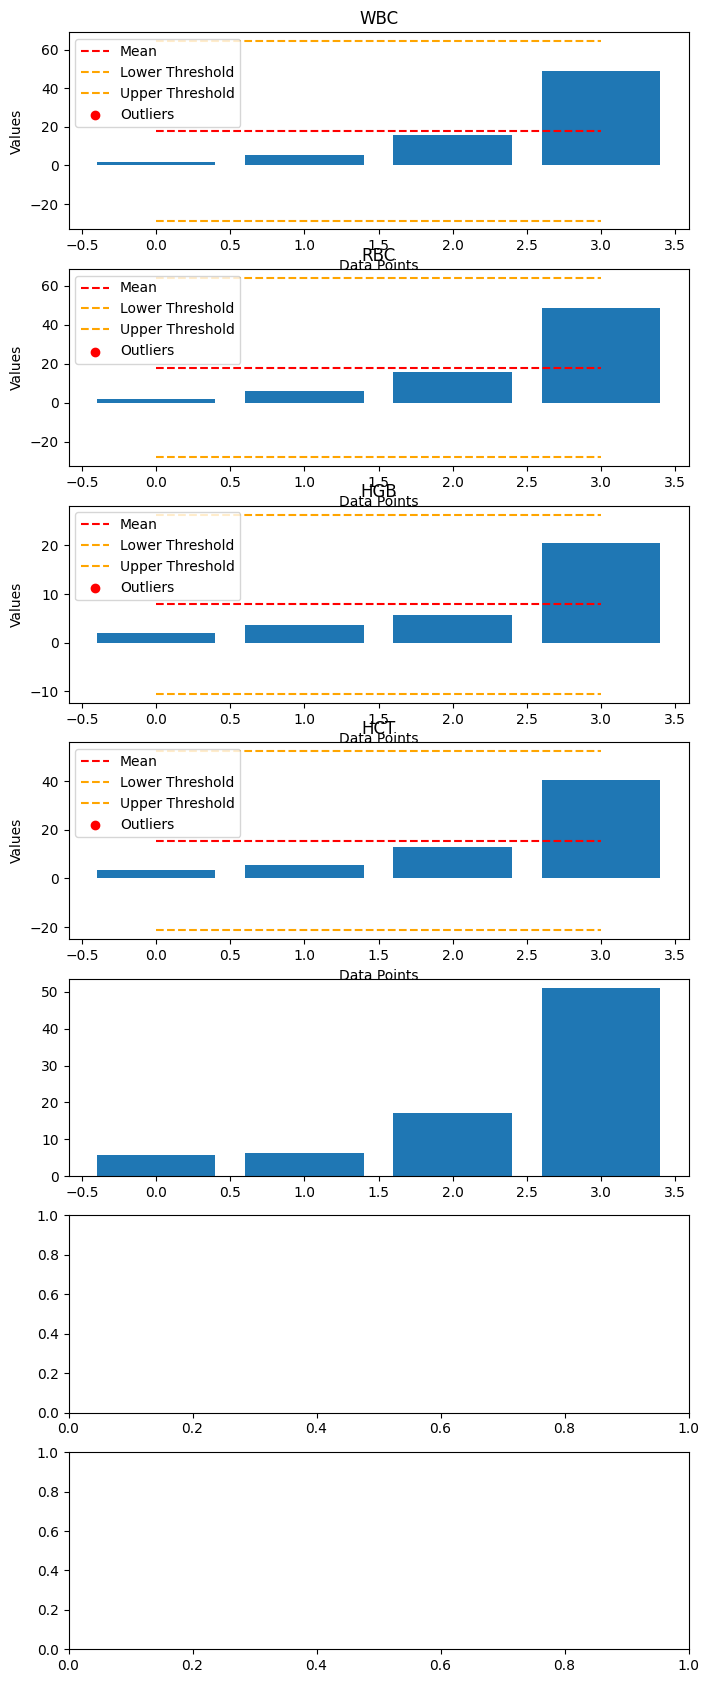

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data
data = np.array([
    df['WBC'].tolist(),
    df['RBC'].tolist(),
    df['HGB'].tolist(),
    df['HCT'].tolist()
])


# Column names
columns = ['WBC', 'RBC', 'HGB', 'HCT']

# Determine the number of columns
num_cols = data.shape[1]

# Create subplots for each column
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols * 3))

# Iterate over each column and plot the bar chart
for i in range(num_cols):
    ax = axes[i]
    ax.bar(range(len(data[:, i])), data[:, i])
    ax.set_title(columns[i])
    ax.set_xlabel('Data Points')
    ax.set_ylabel('Values')

    # Calculate outliers based on a threshold (adjust as needed)
    threshold = 2.5
    column_data = data[:, i]
    mean = np.mean(column_data)
    std = np.std(column_data)
    outliers = column_data[(column_data < mean - threshold * std) | (column_data > mean + threshold * std)]
    ax.plot(range(len(data[:, i])), [mean] * len(data[:, i]), color='red', linestyle='--', label='Mean')
    ax.plot(range(len(data[:, i])), [mean - threshold * std] * len(data[:, i]), color='orange', linestyle='--', label='Lower Threshold')
    ax.plot(range(len(data[:, i])), [mean + threshold * std] * len(data[:, i]), color='orange', linestyle='--', label='Upper Threshold')
    ax.scatter(np.where(np.isin(column_data, outliers))[0], outliers, color='red', label='Outliers')

    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
